In [2]:
import sys

!{sys.executable} -m pip install -q gdown
!{sys.executable} -m pip install -q pandas
!{sys.executable} -m pip install -q scikit-learn
!{sys.executable} -m pip install -q rasterio
!{sys.executable} -m pip install -q matplotlib
!{sys.executable} -m pip install -q albumentations
!{sys.executable} -m pip install -q timm 
!{sys.executable} -m pip install -q torch
!{sys.executable} -m pip install -q tqdm 
!{sys.executable} -m pip install -q opendatasets
!{sys.executable} -m pip install -q kaggle
!{sys.executable} -m pip install fastparquet
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [fastparquet]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 15.1 MB/s eta 0:00:00


In [2]:
# import gdown

# # link chia sẻ Google Drive (dạng share link)
# url = "https://drive.google.com/uc?id=1-4FkPgjgqiEFRxpr3Eoh2JLI0nfJMMbw"  # thay FILE_ID bằng id thực tế
# output = "bigearthnet_12band_10m.zip"

# # tải file về
# gdown.download(url, output, quiet=False)

# # giải nén
# import zipfile
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

In [3]:
# !mkdir -p ~/.kaggle
# !cp "kaggle (2).json" ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d nhanle03/bigearthnet-12band-10m-1

In [5]:
# # giải nén
# import zipfile
# with zipfile.ZipFile("bigearthnet-12band-10m-1.zip", 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

In [6]:
# # Tạo thư mục đích nếu chưa có
# !kaggle datasets download -d immulu/bigearthnetv2-reference-maps

# !mkdir -p ./lable_metadata

# # Giải nén chỉ 1 file: metadata.parquet
# !unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

In [7]:
# import shutil
# import os

# src = "data/content/bigearthnet_12band_10m_1"
# dst = "data/content/bigearthnet_12band_10m"

# # Di chuyển toàn bộ file từ src sang dst
# for file_name in os.listdir(src):
#     shutil.move(os.path.join(src, file_name), dst)

# # (Tuỳ chọn) Xoá thư mục rỗng
# os.rmdir(src)

In [8]:
# example_file = os.path.join(dst, "S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP",
#                             "S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif")

# print("Tồn tại file:", os.path.exists(example_file))

In [3]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

FileNotFoundError: [Errno 2] No such file or directory: './lable_metadata/metadata.parquet'

In [10]:
df["labels"][15]

['Arable land',
 'Broad-leaved forest',
 'Inland waters',
 'Pastures',
 'Urban fabric']

In [11]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [12]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [13]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [14]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "data/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [15]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

Shape của ảnh S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB_13_83_12band.tif: (12, 120, 120) (channels, height, width)


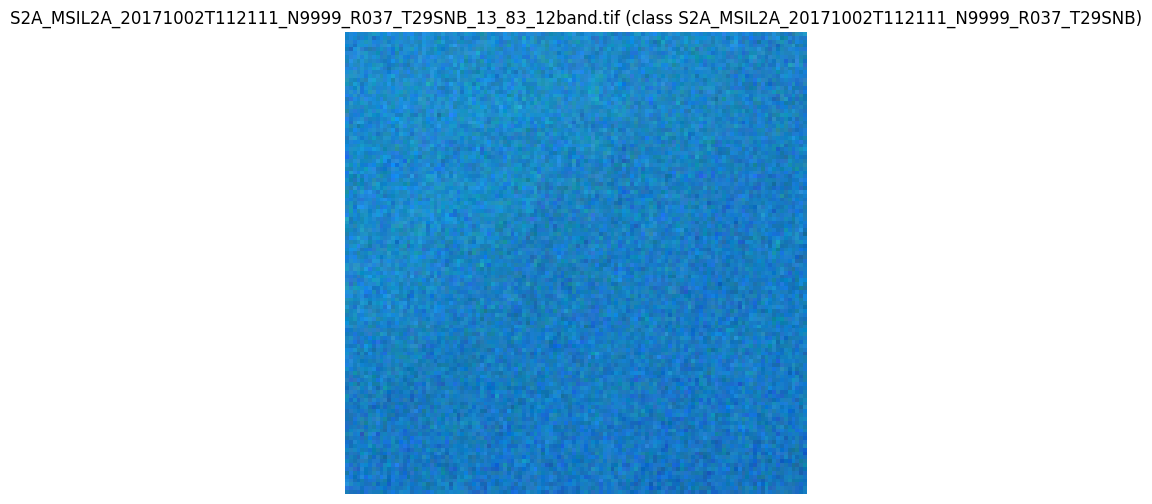

In [16]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [17]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [18]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "data/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow,image_path
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...


In [19]:
train_list[0]

('data/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [21]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [22]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "data/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_72_61_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_70_21_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_19_62_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_45_42_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_58_80_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_28_53_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_27_82_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_08_28_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_55_10_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_48_21_12band.tif


In [23]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/venv/main/lib/python3.12/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [24]:
from torch.utils.data import Dataset
import torch
import numpy as np
import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list  # List of (img_path, label_list)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W) hoặc (13, H, W)

        # Giữ lại 3 bands
        bands_to_keep = [i for i in range(image.shape[0]) if i not in [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
        # bands_to_keep = [i for i in range(image.shape[0]) if i not in []]
        image = image[bands_to_keep, :, :]

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C)


        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)

        # Chuyển label thành Tensor float cho multi-label
        label = torch.tensor(label, dtype=torch.float32)

        return image, label

In [25]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 128

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [26]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


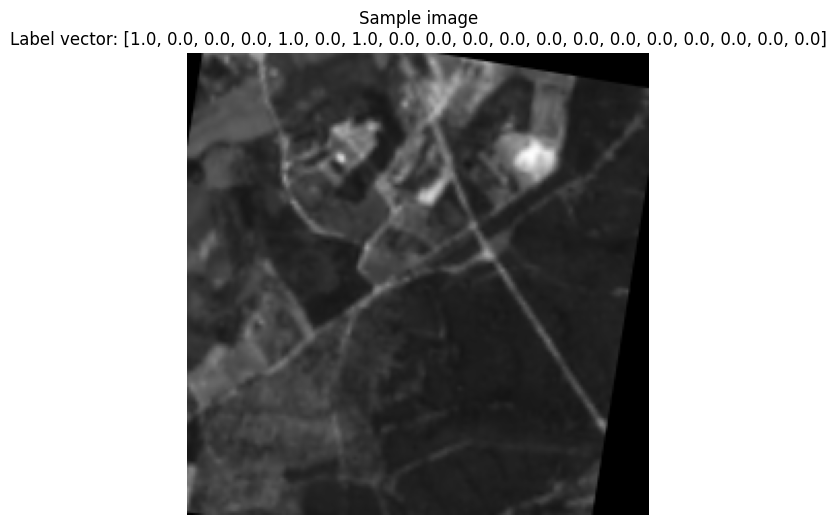

In [27]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[3]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [0, 0, 0]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


VIT

In [28]:
import timm
import torch.nn as nn
import torch

# Load ViT Hybrid pretrained
model = timm.create_model("vit_base_r50_s16_224", pretrained=True)

# Giữ Conv2d đầu tiên với 3 kênh input
old_conv = model.patch_embed.backbone.stem[0]
new_conv = nn.Conv2d(
    in_channels=1,
    out_channels=old_conv.out_channels,
    kernel_size=old_conv.kernel_size,
    stride=old_conv.stride,
    padding=old_conv.padding,
    bias=False
)

# with torch.no_grad():
#     old_weight = old_conv.weight  # (out_c, 3, kH, kW)
#     # Lặp 3 lần theo chiều channel để thành 9
#     new_weight = old_weight.repeat(1, 3, 1, 1) / 3.0
#     new_conv.weight[:, :9, :, :] = new_weight[:, :9, :, :]
with torch.no_grad():
    # Lấy weight cũ (3 channel)
    old_weight = old_conv.weight  # shape: (out_c, 3, kH, kW)
    new_weight = old_weight.mean(dim=1, keepdim=True)  # (out_c, 1, kH, kW)
    new_conv.weight[:, :1, :, :] = new_weight

model.patch_embed.backbone.stem[0] = new_conv

# Thay thế head cho 19 nhãn multi-label
num_features = model.num_features
model.head = nn.Sequential(
    nn.Linear(num_features, 19),
    nn.Sigmoid()
)

# Đưa model lên GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).")

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).


In [29]:
import torch.optim as optim

# Loss cho multi-label classification
criterion = nn.BCELoss()

# Optimizer (AdamW thường dùng với ViT)
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [30]:
class EarlyStopping:
    def __init__(self, save_path, patience=3, delta=0):
        """
        patience: số epoch không cải thiện trước khi dừng
        delta: mức cải thiện tối thiểu được coi là tốt hơn
        save_path: nơi lưu model tốt nhất
        """
        self.patience = patience
        self.delta = delta
        self.save_path = save_path
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        score = -val_loss  # vì nhỏ hơn là tốt hơn

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f"🔴 EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0  # reset counter

    def save_checkpoint(self, val_loss, model):
        torch.save(model, self.save_path)
        print(f"✅ Saved best model (val_loss={val_loss:.4f})")


In [31]:
from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Training", unit="batch")):
        images = images.to(device)
        labels = torch.tensor(labels, dtype=torch.float32).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Validating", unit="batch")):
            images = images.to(device)
            labels = torch.tensor(labels, dtype=torch.float32).to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    return total_loss / len(dataloader)


In [32]:
sample_img, sample_label = train_dataset[0]
print(f"Type image: {type(sample_img)}, shape: {getattr(sample_img, 'shape', None)}, dtype: {getattr(sample_img, 'dtype', None)}")
print(f"Type label: {type(sample_label)}, shape: {getattr(sample_label, 'shape', None)}, dtype: {getattr(sample_label, 'dtype', None)}")


Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


In [33]:
import gc

early_stopping = EarlyStopping(save_path="my_pytorch_model_bigearth_1_keepB2.pth", patience=3, delta=0.001)

NUM_EPOCHS = 10
device = "cuda" if torch.cuda.is_available() else "cpu"

for epoch in range(NUM_EPOCHS):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate(model, val_loader, criterion, device)

    scheduler.step()

    print(f"Epoch {epoch+1}/{NUM_EPOCHS}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    early_stopping(val_loss, model)

    # Giải phóng bộ nhớ
    torch.cuda.empty_cache()
    gc.collect()

    if early_stopping.early_stop:
        print("🛑 Early stopping triggered!")
        break


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1265811921.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1265811921.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:21<00:00,  1.48batch/s]


Epoch 1/10: Train Loss = 0.1980, Val Loss = 0.1662
✅ Saved best model (val_loss=0.1662)


Validating: 100%|██████████| 121/121 [01:24<00:00,  1.42batch/s]


Epoch 2/10: Train Loss = 0.1655, Val Loss = 0.1607
✅ Saved best model (val_loss=0.1607)


Validating: 100%|██████████| 121/121 [01:23<00:00,  1.46batch/s]


Epoch 3/10: Train Loss = 0.1569, Val Loss = 0.1608
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 4/10: Train Loss = 0.1510, Val Loss = 0.1525
✅ Saved best model (val_loss=0.1525)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 5/10: Train Loss = 0.1450, Val Loss = 0.1494
✅ Saved best model (val_loss=0.1494)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.41batch/s]


Epoch 6/10: Train Loss = 0.1278, Val Loss = 0.1428
✅ Saved best model (val_loss=0.1428)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 7/10: Train Loss = 0.1180, Val Loss = 0.1428
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:32<00:00,  1.31batch/s]


Epoch 8/10: Train Loss = 0.1064, Val Loss = 0.1450
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 9/10: Train Loss = 0.0921, Val Loss = 0.1524
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!


In [34]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("⚡ Using device:", device)

model_path = "my_pytorch_model_bigearth_1_keepB2.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
model.to(device)

random_image = torch.rand((1, 224, 224), dtype=torch.float32, device=device)

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted = (output.squeeze() > 0.5).cpu().numpy()

print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)


⚡ Using device: cuda
Output sigmoid:
 [2.40070280e-03 1.18825410e-03 6.36254903e-03 1.23032951e-03
 6.26539229e-04 2.56881496e-04 3.95400275e-04 2.41733811e-04
 2.55973951e-04 4.43457114e-03 8.89711201e-01 2.45521573e-04
 1.10121058e-04 5.26944466e-04 1.16205214e-04 3.44631590e-05
 7.35094145e-05 2.99770199e-05 1.26893879e-04]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]


In [35]:
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score
)
import numpy as np

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1_class0_removeB1B2B6.pth"
# model = torch.load(model_path, map_location=device, weights_only=False)
# model = model.to(device)

def evaluate(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = (outputs > threshold).float()

            # all_preds.append(preds.cpu().numpy())
            all_preds.append(outputs.cpu().numpy())  # không threshold
            all_labels.append(labels.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    return all_preds, all_labels


# Run evaluation
preds, true_labels = evaluate(model, test_loader, device)

# Tính mAP (mean average precision)
# mAP = average_precision_score(true_labels, preds, average='macro')
mAP = average_precision_score(true_labels, preds, average='macro')

# Apply threshold
threshold = 0.5
preds = (preds >= threshold).astype(int)

# Tính Precision, Recall, F1 cho từng class
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, preds, average=None, zero_division=0
)

# Tính macro average
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='macro', zero_division=0
)

# Tính micro average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='micro', zero_division=0
)

print("Macro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
    macro_precision, macro_recall, macro_f1))
print("Micro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
    micro_precision, micro_recall, micro_f1))

print(f"mAP (macro): {mAP:.6f}")

# Classification report cho từng class
class_names = class_list  # lấy từ đoạn code bạn có trước đó
print("\n Classification Report:")
print(classification_report(
    true_labels, preds,
    target_names=class_names,
    zero_division=0,
    digits=6
))


Macro Precision: 0.803305, Recall: 0.680204, F1: 0.730299
Micro Precision: 0.815791, Recall: 0.766108, F1: 0.790169
mAP (macro): 0.807189

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.887865  0.867878  0.877758      6441
                                                                          Mixed forest   0.811441  0.861538  0.835740      5005
                                                                     Coniferous forest   0.869381  0.860535  0.864935      5012
                                                          Transitional woodland, shrub   0.692678  0.720064  0.706105      4401
                                                                   Broad-leaved forest   0.742391  0.681410  0.710595      3007
Land principally occupied by agriculture, with significant areas of 

In [36]:
def exclude_number(x):
    if not (0 <= x <= 11):
        raise ValueError("Số phải nằm trong khoảng 0-11")
    return [i for i in range(12) if i != x]

def train(band_idx):    
    from torch.utils.data import Dataset
    import torch
    import numpy as np
    import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

    filename = "my_pytorch_model_bigearth_1_keepB" + str(band_idx+1) + ".pth"
    
    class BigEarthNetDataset(Dataset):
        def __init__(self, data_list, transform=None):
            self.data_list = data_list  # List of (img_path, label_list)
            self.transform = transform
    
        def __len__(self):
            return len(self.data_list)
    
        def __getitem__(self, idx):
            img_path, label = self.data_list[idx]
    
            with rasterio.open(img_path) as src:
                image = src.read()  # (12, H, W) hoặc (13, H, W)
    
            # Giữ lại 3 bands
            bands_to_keep = [i for i in range(image.shape[0]) if i not in exclude_number(band_idx)]
            # bands_to_keep = [i for i in range(image.shape[0]) if i not in []]
            image = image[bands_to_keep, :, :]
    
            image = image.astype(np.float32) / 10000.0
            image = np.transpose(image, (1, 2, 0))  # (H, W, C)
    
    
            if self.transform:
                augmented = self.transform(image=image)
                image = augmented['image']
            else:
                image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)
    
            # Chuyển label thành Tensor float cho multi-label
            label = torch.tensor(label, dtype=torch.float32)
    
            return image, label
        
    from torch.utils.data import DataLoader
    
    # Batch size
    BATCH_SIZE = 128
    
    # Dataset
    train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
    val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
    test_dataset = BigEarthNetDataset(test_list, transform=val_transform)
    
    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Lấy 1 mẫu bất kỳ từ train_dataset
    sample_img, sample_label = train_dataset[3]
    
    # Kiểm tra thông tin label
    print("Label Tensor:", sample_label)
    print("Shape:", sample_label.shape)
    print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
    print("Non-zero class count:", torch.sum(sample_label).item())
    
    # Chuyển tensor về numpy để hiển thị
    sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)
    
    # Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
    rgb = sample_img_np[:, :, [0, 0, 0]]
    
    # Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)
    
    # Hiển thị ảnh
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
    plt.axis("off")
    plt.show()
    
    import timm
    import torch.nn as nn
    import torch
    
    # Load ViT Hybrid pretrained
    model = timm.create_model("vit_base_r50_s16_224", pretrained=True)
    
    # Giữ Conv2d đầu tiên với 3 kênh input
    old_conv = model.patch_embed.backbone.stem[0]
    new_conv = nn.Conv2d(
        in_channels=1,
        out_channels=old_conv.out_channels,
        kernel_size=old_conv.kernel_size,
        stride=old_conv.stride,
        padding=old_conv.padding,
        bias=False
    )
    
    # with torch.no_grad():
    #     old_weight = old_conv.weight  # (out_c, 3, kH, kW)
    #     # Lặp 3 lần theo chiều channel để thành 9
    #     new_weight = old_weight.repeat(1, 3, 1, 1) / 3.0
    #     new_conv.weight[:, :9, :, :] = new_weight[:, :9, :, :]
    with torch.no_grad():
        # Lấy weight cũ (3 channel)
        old_weight = old_conv.weight  # shape: (out_c, 3, kH, kW)
        new_weight = old_weight.mean(dim=1, keepdim=True)  # (out_c, 1, kH, kW)
        new_conv.weight[:, :1, :, :] = new_weight
    
    model.patch_embed.backbone.stem[0] = new_conv
    
    # Thay thế head cho 19 nhãn multi-label
    num_features = model.num_features
    model.head = nn.Sequential(
        nn.Linear(num_features, 19),
        nn.Sigmoid()
    )
    
    # Đưa model lên GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    print("ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).")
    
    import torch.optim as optim
    
    # Loss cho multi-label classification
    criterion = nn.BCELoss()
    
    # Optimizer (AdamW thường dùng với ViT)
    optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
    
    # Optional: Learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    class EarlyStopping:
        def __init__(self, save_path, patience=3, delta=0):
            """
            patience: số epoch không cải thiện trước khi dừng
            delta: mức cải thiện tối thiểu được coi là tốt hơn
            save_path: nơi lưu model tốt nhất
            """
            self.patience = patience
            self.delta = delta
            self.save_path = save_path
            self.counter = 0
            self.best_score = None
            self.early_stop = False
    
        def __call__(self, val_loss, model):
            score = -val_loss  # vì nhỏ hơn là tốt hơn
    
            if self.best_score is None:
                self.best_score = score
                self.save_checkpoint(val_loss, model)
            elif score < self.best_score + self.delta:
                self.counter += 1
                print(f"🔴 EarlyStopping counter: {self.counter}/{self.patience}")
                if self.counter >= self.patience:
                    self.early_stop = True
            else:
                self.best_score = score
                self.save_checkpoint(val_loss, model)
                self.counter = 0  # reset counter
    
        def save_checkpoint(self, val_loss, model):
            torch.save(model, self.save_path)
            print(f"✅ Saved best model (val_loss={val_loss:.4f})")
    
    from tqdm import tqdm
    
    def train_one_epoch(model, dataloader, optimizer, criterion, device):
        model.train()
        total_loss = 0
    
        for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Training", unit="batch")):
            images = images.to(device)
            labels = torch.tensor(labels, dtype=torch.float32).to(device)
    
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            total_loss += loss.item()
    
        return total_loss / len(dataloader)
    
    
    def validate(model, dataloader, criterion, device):
        model.eval()
        total_loss = 0
        all_preds, all_labels = [], []
    
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Validating", unit="batch")):
                images = images.to(device)
                labels = torch.tensor(labels, dtype=torch.float32).to(device)
    
                outputs = model(images)
                loss = criterion(outputs, labels)
    
                total_loss += loss.item()
                all_preds.append(outputs.cpu())
                all_labels.append(labels.cpu())
    
        return total_loss / len(dataloader)
    
    sample_img, sample_label = train_dataset[0]
    print(f"Type image: {type(sample_img)}, shape: {getattr(sample_img, 'shape', None)}, dtype: {getattr(sample_img, 'dtype', None)}")
    print(f"Type label: {type(sample_label)}, shape: {getattr(sample_label, 'shape', None)}, dtype: {getattr(sample_label, 'dtype', None)}")
    
    import gc
    
    early_stopping = EarlyStopping(save_path=filename, patience=3, delta=0.001)
    
    NUM_EPOCHS = 10
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    for epoch in range(NUM_EPOCHS):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss = validate(model, val_loader, criterion, device)
    
        scheduler.step()
    
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
    
        early_stopping(val_loss, model)
    
        # Giải phóng bộ nhớ
        torch.cuda.empty_cache()
        gc.collect()
    
        if early_stopping.early_stop:
            print("🛑 Early stopping triggered!")
            break
    
    import torch
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("⚡ Using device:", device)
    
    model_path = filename
    model = torch.load(model_path, map_location=device, weights_only=False)
    model.eval()
    model.to(device)
    
    random_image = torch.rand((1, 224, 224), dtype=torch.float32, device=device)
    
    with torch.no_grad():
        output = model(random_image.unsqueeze(0))
        predicted = (output.squeeze() > 0.5).cpu().numpy()
    
    print("Output sigmoid:\n", output.squeeze().cpu().numpy())
    print("Predicted Labels:\n", predicted)
    
    from sklearn.metrics import (
        classification_report, multilabel_confusion_matrix, roc_auc_score,
        precision_recall_fscore_support, average_precision_score
    )
    import numpy as np
    
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1_class0_removeB1B2B6.pth"
    # model = torch.load(model_path, map_location=device, weights_only=False)
    # model = model.to(device)
    
    def evaluate(model, dataloader, device, threshold=0.5):
        model.eval()
        all_preds, all_labels = [], []
    
        with torch.no_grad():
            for images, labels in dataloader:
                images = images.to(device)
                labels = labels.to(device)
    
                outputs = model(images)
                preds = (outputs > threshold).float()
    
                # all_preds.append(preds.cpu().numpy())
                all_preds.append(outputs.cpu().numpy())  # không threshold
                all_labels.append(labels.cpu().numpy())
    
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
    
        return all_preds, all_labels
    
    
    # Run evaluation
    preds, true_labels = evaluate(model, test_loader, device)
    
    # Tính mAP (mean average precision)
    # mAP = average_precision_score(true_labels, preds, average='macro')
    mAP = average_precision_score(true_labels, preds, average='macro')
    
    # Apply threshold
    threshold = 0.5
    preds = (preds >= threshold).astype(int)
    
    # Tính Precision, Recall, F1 cho từng class
    precision, recall, f1, _ = precision_recall_fscore_support(
        true_labels, preds, average=None, zero_division=0
    )
    
    # Tính macro average
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        true_labels, preds, average='macro', zero_division=0
    )
    
    # Tính micro average
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
        true_labels, preds, average='micro', zero_division=0
    )
    
    print("Macro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
        macro_precision, macro_recall, macro_f1))
    print("Micro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
        micro_precision, micro_recall, micro_f1))
    
    print(f"mAP (macro): {mAP:.6f}")
    
    # Classification report cho từng class
    class_names = class_list  # lấy từ đoạn code bạn có trước đó
    print("\n Classification Report:")
    print(classification_report(
        true_labels, preds,
        target_names=class_names,
        zero_division=0,
        digits=6
    ))

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


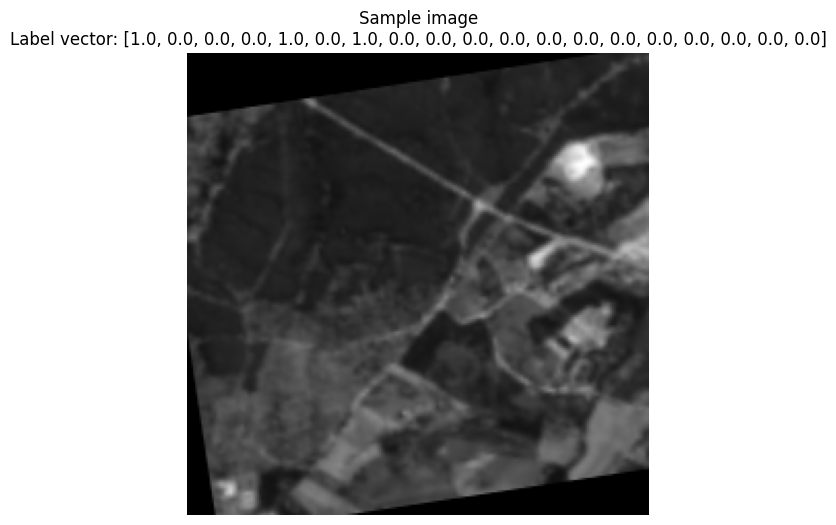

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:24<00:00,  1.43batch/s]


Epoch 1/10: Train Loss = 0.1964, Val Loss = 0.1693
✅ Saved best model (val_loss=0.1693)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 2/10: Train Loss = 0.1646, Val Loss = 0.1586
✅ Saved best model (val_loss=0.1586)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 3/10: Train Loss = 0.1557, Val Loss = 0.1544
✅ Saved best model (val_loss=0.1544)


Validating: 100%|██████████| 121/121 [01:22<00:00,  1.47batch/s]


Epoch 4/10: Train Loss = 0.1493, Val Loss = 0.1540
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.34batch/s]


Epoch 5/10: Train Loss = 0.1439, Val Loss = 0.1475
✅ Saved best model (val_loss=0.1475)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 6/10: Train Loss = 0.1261, Val Loss = 0.1404
✅ Saved best model (val_loss=0.1404)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.39batch/s]


Epoch 7/10: Train Loss = 0.1151, Val Loss = 0.1415
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:31<00:00,  1.32batch/s]


Epoch 8/10: Train Loss = 0.1028, Val Loss = 0.1445
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:30<00:00,  1.34batch/s]


Epoch 9/10: Train Loss = 0.0888, Val Loss = 0.1510
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [8.0617471e-03 6.6600851e-04 5.7511061e-04 1.3947232e-03 9.9899713e-04
 2.9329705e-04 4.1666863e-04 3.5305522e-04 4.4562601e-04 1.1716938e-02
 5.5771905e-01 1.3288257e-03 2.7594023e-04 5.5314763e-04 6.9642199e-05
 3.7215515e-05 1.6553261e-04 2.8867989e-05 4.2317453e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]
Macro Precision: 0.818733, Recall: 0.672567, F1: 0.730462
Micro Precision: 0.829719, Recall: 0.756973, F1: 0.791678
mAP (macro): 0.812997

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.884971  0.876727  0.880830      6441
                           

In [37]:
# BAND 4
train(3)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


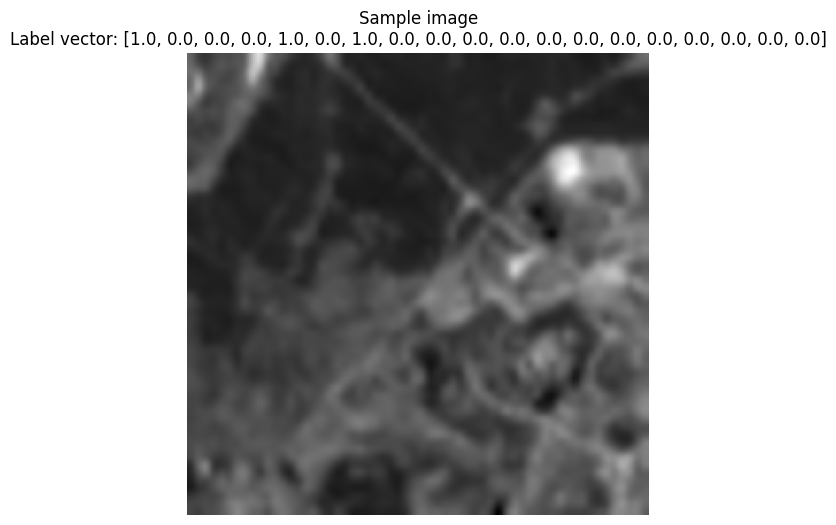

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:25<00:00,  1.41batch/s]


Epoch 1/10: Train Loss = 0.2190, Val Loss = 0.1826
✅ Saved best model (val_loss=0.1826)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 2/10: Train Loss = 0.1861, Val Loss = 0.1742
✅ Saved best model (val_loss=0.1742)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 3/10: Train Loss = 0.1759, Val Loss = 0.1710
✅ Saved best model (val_loss=0.1710)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.34batch/s]


Epoch 4/10: Train Loss = 0.1687, Val Loss = 0.1668
✅ Saved best model (val_loss=0.1668)


Validating: 100%|██████████| 121/121 [01:30<00:00,  1.33batch/s]


Epoch 5/10: Train Loss = 0.1633, Val Loss = 0.1660
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 6/10: Train Loss = 0.1440, Val Loss = 0.1556
✅ Saved best model (val_loss=0.1556)


Validating: 100%|██████████| 121/121 [01:30<00:00,  1.33batch/s]


Epoch 7/10: Train Loss = 0.1345, Val Loss = 0.1565
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:31<00:00,  1.33batch/s]


Epoch 8/10: Train Loss = 0.1239, Val Loss = 0.1567
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:32<00:00,  1.31batch/s]


Epoch 9/10: Train Loss = 0.1111, Val Loss = 0.1694
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [1.9633448e-02 1.8958334e-02 1.1461657e-02 1.3886027e-02 1.4224896e-01
 1.6719605e-03 6.6219264e-04 1.2058957e-03 9.6660049e-04 1.8605953e-03
 5.9529322e-01 2.2189249e-03 5.3085049e-04 8.2496583e-04 2.6571448e-04
 9.3592265e-05 6.6202861e-04 7.0470443e-04 8.6731656e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]
Macro Precision: 0.789599, Recall: 0.615632, F1: 0.680658
Micro Precision: 0.821892, Recall: 0.707611, F1: 0.760482
mAP (macro): 0.764130

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.863544  0.861667  0.862605      6441
                           

In [38]:
# BAND 6
train(5)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


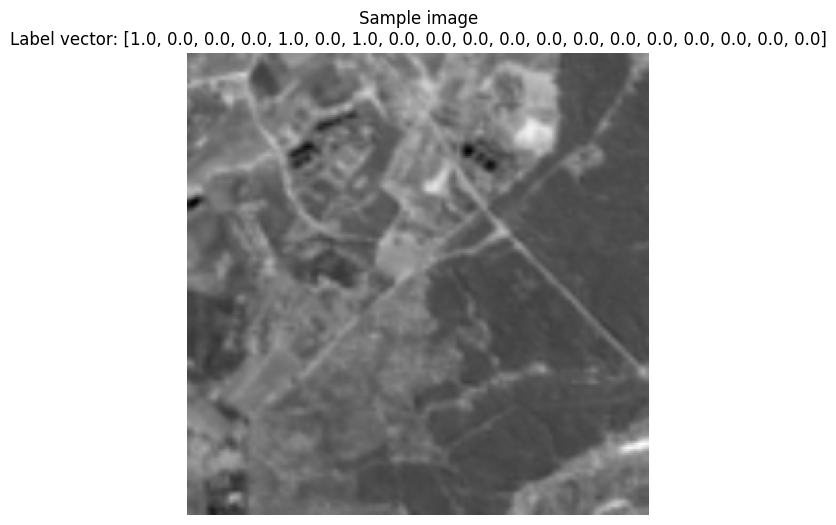

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 1/10: Train Loss = 0.2017, Val Loss = 0.1683
✅ Saved best model (val_loss=0.1683)


Validating: 100%|██████████| 121/121 [01:30<00:00,  1.34batch/s]


Epoch 2/10: Train Loss = 0.1689, Val Loss = 0.1610
✅ Saved best model (val_loss=0.1610)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 3/10: Train Loss = 0.1602, Val Loss = 0.1570
✅ Saved best model (val_loss=0.1570)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.34batch/s]


Epoch 4/10: Train Loss = 0.1538, Val Loss = 0.1506
✅ Saved best model (val_loss=0.1506)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.34batch/s]


Epoch 5/10: Train Loss = 0.1478, Val Loss = 0.1530
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.36batch/s]


Epoch 6/10: Train Loss = 0.1303, Val Loss = 0.1424
✅ Saved best model (val_loss=0.1424)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 7/10: Train Loss = 0.1202, Val Loss = 0.1443
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:30<00:00,  1.34batch/s]


Epoch 8/10: Train Loss = 0.1097, Val Loss = 0.1460
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:33<00:00,  1.29batch/s]


Epoch 9/10: Train Loss = 0.0966, Val Loss = 0.1530
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [2.9346375e-02 1.2407677e-03 2.5223249e-03 1.3389986e-03 9.8214541e-03
 1.7615159e-03 3.7428059e-03 1.2078311e-03 2.2623152e-02 3.0377312e-03
 1.7029914e-01 2.8344037e-04 2.0549948e-04 9.6004689e-05 5.6864843e-05
 2.9179510e-05 2.3964106e-03 2.2076163e-04 2.2335786e-05]
Predicted Labels:
 [False False False False False False False False False False False False
 False False False False False False False]
Macro Precision: 0.817252, Recall: 0.654860, F1: 0.718231
Micro Precision: 0.835668, Recall: 0.739873, F1: 0.784858
mAP (macro): 0.806624

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.885895  0.847384  0.866212      6441
                           

In [39]:
# BAND 8
train(7)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


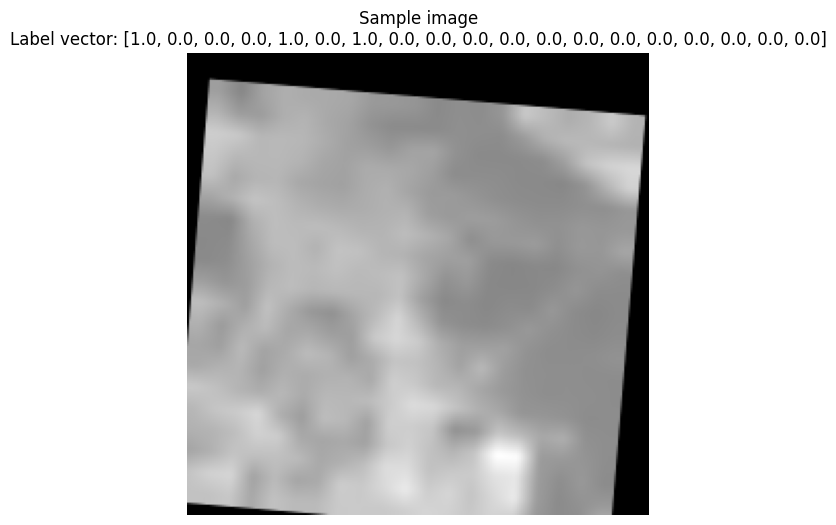

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 1/10: Train Loss = 0.2594, Val Loss = 0.2355
✅ Saved best model (val_loss=0.2355)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 2/10: Train Loss = 0.2270, Val Loss = 0.2222
✅ Saved best model (val_loss=0.2222)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 3/10: Train Loss = 0.2194, Val Loss = 0.2141
✅ Saved best model (val_loss=0.2141)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.36batch/s]


Epoch 4/10: Train Loss = 0.2123, Val Loss = 0.2065
✅ Saved best model (val_loss=0.2065)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 5/10: Train Loss = 0.2071, Val Loss = 0.2056
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.36batch/s]


Epoch 6/10: Train Loss = 0.1926, Val Loss = 0.1964
✅ Saved best model (val_loss=0.1964)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 7/10: Train Loss = 0.1881, Val Loss = 0.1934
✅ Saved best model (val_loss=0.1934)


Validating: 100%|██████████| 121/121 [01:31<00:00,  1.33batch/s]


Epoch 8/10: Train Loss = 0.1830, Val Loss = 0.1942
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:31<00:00,  1.33batch/s]


Epoch 9/10: Train Loss = 0.1771, Val Loss = 0.1963
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:31<00:00,  1.32batch/s]


Epoch 10/10: Train Loss = 0.1693, Val Loss = 0.1975
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [1.72982141e-02 3.25560048e-02 1.08953165e-02 3.06030419e-02
 7.25624114e-02 1.83371022e-01 7.75673660e-03 9.76058543e-02
 6.71718195e-02 2.34189592e-02 8.44471739e-04 2.65150389e-04
 3.73211387e-03 2.53310800e-03 9.08262096e-03 1.84205524e-03
 1.12904282e-03 1.57243776e-04 3.29919530e-05]
Predicted Labels:
 [False False False False False False False False False False False False
 False False False False False False False]
Macro Precision: 0.721536, Recall: 0.491817, F1: 0.557667
Micro Precision: 0.770067, Recall: 0.625286, F1: 0.690166
mAP (macro): 0.637352

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.786838  0.800031  0.793380      6441
      

In [40]:
# BAND 10
train(9)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


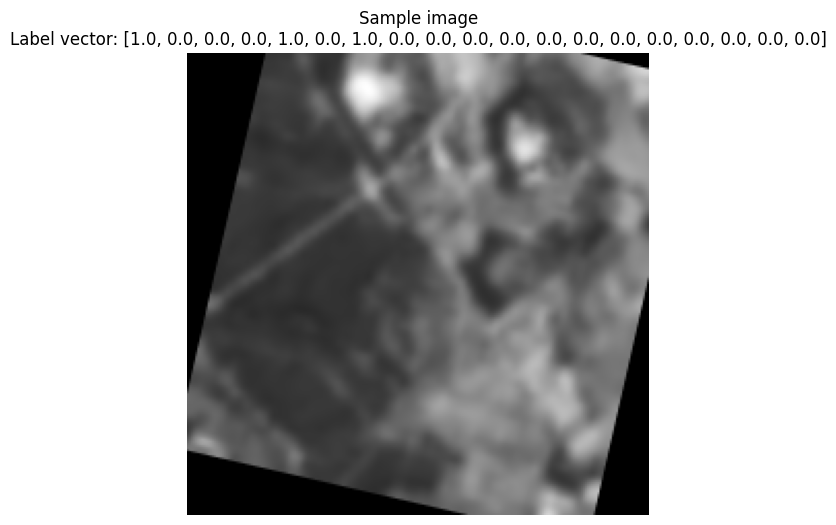

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_10836/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 1/10: Train Loss = 0.2071, Val Loss = 0.1778
✅ Saved best model (val_loss=0.1778)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 2/10: Train Loss = 0.1751, Val Loss = 0.1694
✅ Saved best model (val_loss=0.1694)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 3/10: Train Loss = 0.1663, Val Loss = 0.1632
✅ Saved best model (val_loss=0.1632)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 4/10: Train Loss = 0.1609, Val Loss = 0.1586
✅ Saved best model (val_loss=0.1586)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 5/10: Train Loss = 0.1554, Val Loss = 0.1569
✅ Saved best model (val_loss=0.1569)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 6/10: Train Loss = 0.1383, Val Loss = 0.1495
✅ Saved best model (val_loss=0.1495)


Validating: 100%|██████████| 121/121 [01:09<00:00,  1.74batch/s]


Epoch 7/10: Train Loss = 0.1294, Val Loss = 0.1487
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:11<00:00,  1.68batch/s]


Epoch 8/10: Train Loss = 0.1185, Val Loss = 0.1514
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:13<00:00,  1.65batch/s]


Epoch 9/10: Train Loss = 0.1052, Val Loss = 0.1561
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [6.7860812e-02 1.5687010e-01 7.4706629e-02 4.1652214e-02 8.0152303e-03
 2.2036550e-03 2.1830248e-03 2.4470054e-03 1.1477148e-03 4.3464908e-03
 2.5028175e-02 7.7167720e-02 4.9841474e-04 2.6030725e-04 4.3200736e-04
 6.1647253e-05 1.1310564e-04 3.7411937e-05 3.3955967e-05]
Predicted Labels:
 [False False False False False False False False False False False False
 False False False False False False False]
Macro Precision: 0.790529, Recall: 0.639869, F1: 0.698333
Micro Precision: 0.821613, Recall: 0.730692, F1: 0.773490
mAP (macro): 0.778705

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.862163  0.887595  0.874694      6441
                           

In [41]:
# BAND 12
train(11)